In [1]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")
print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/insurance.csv")

Path to dataset files: C:\Users\sergi\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1


Check

In [2]:
print(df.columns)

print(df.shape)

df.head()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(df.isnull().sum())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


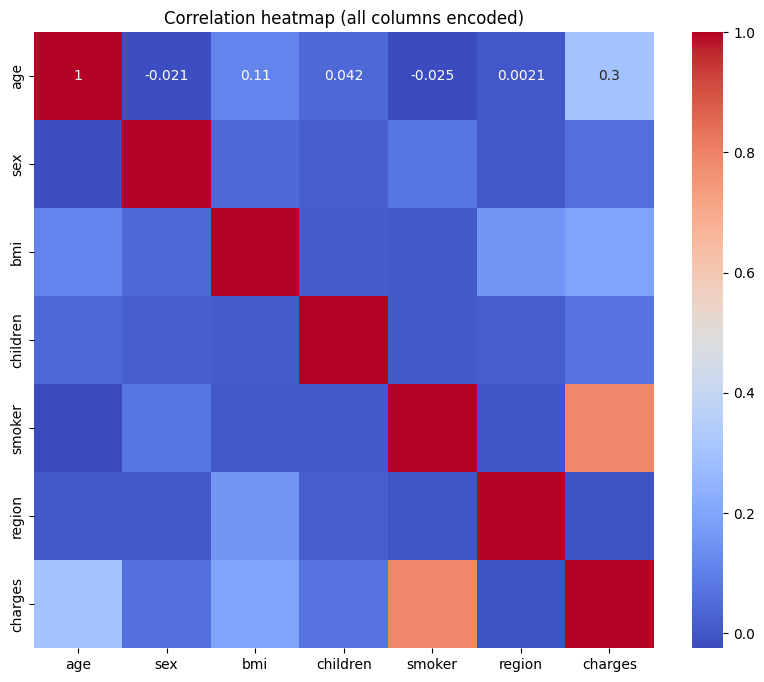

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder

for col in ['sex', 'smoker', 'region']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation heatmap (all columns encoded)")
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = le.fit_transform(df[col])

X = df.drop('charges', axis=1)
y = df['charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

y_cat = pd.qcut(y, q=5, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

best_k = 0
best_score = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Best k:", best_k)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best k: 18
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        62
           1       0.75      0.81      0.78        59
           2       0.59      0.80      0.68        44
           3       0.79      0.57      0.67        47
           4       0.90      0.79      0.84        56

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

[[54  8  0  0  0]
 [ 3 48  8  0  0]
 [ 0  5 35  4  0]
 [ 2  3 10 27  5]
 [ 3  0  6  3 44]]


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        62
           1       0.84      0.69      0.76        59
           2       0.72      0.82      0.77        44
           3       0.71      0.72      0.72        47
           4       0.75      0.77      0.76        56

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.78      0.78      0.78       268

[[54  2  1  2  3]
 [ 5 41  6  4  3]
 [ 0  3 36  2  3]
 [ 3  1  4 34  5]
 [ 2  2  3  6 43]]


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

svm = GridSearchCV(SVC(), param_grid, cv=5)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("Best params:", svm.best_params_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        62
           1       0.89      0.93      0.91        59
           2       0.78      0.95      0.86        44
           3       0.84      0.77      0.80        47
           4       0.98      0.79      0.87        56

    accuracy                           0.88       268
   macro avg       0.88      0.87      0.87       268
weighted avg       0.88      0.88      0.88       268

[[58  4  0  0  0]
 [ 2 55  2  0  0]
 [ 0  0 42  2  0]
 [ 2  2  6 36  1]
 [ 2  1  4  5 44]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        62
           1       0.83      0.88      0.85        59
           2       0.80      0.93      0.86        44
           3       0.85      0.85      0.85        47
           4       0.98      0.79      0.87        56

    accuracy                           0.87       268
   macro avg       0.88      0.87      0.87       268
weighted avg       0.88      0.87      0.87       268

[[57  3  0  1  1]
 [ 2 52  4  1  0]
 [ 0  2 41  1  0]
 [ 1  4  2 40  0]
 [ 2  2  4  4 44]]


In [23]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.92      0.81        62
           1       0.76      0.76      0.76        59
           2       0.50      0.89      0.64        44
           3       0.33      0.11      0.16        47
           4       0.86      0.57      0.69        56

    accuracy                           0.66       268
   macro avg       0.64      0.65      0.61       268
weighted avg       0.66      0.66      0.63       268

[[57  5  0  0  0]
 [ 9 45  5  0  0]
 [ 0  5 39  0  0]
 [ 7  2 28  5  5]
 [ 6  2  6 10 32]]


| Модель           | Accuracy | Коментар по f1-score                                                          |
| ---------------- | -------- | ----------------------------------------------------------------------------- |
| kNN              | 0.78     | Найнижчий f1 для середніх класів                                              |
| Decision Tree    | 0.78     | Стабільніші показники ніж kNN, але точність для класів 1 та 3 нижча           |
| SVM (GridSearch) | 0.88     | Найкращі результати по всіх класах, висока точність і f1-score                |
| Random Forest    | 0.87     | Дуже близько до SVM, також стабільна модель, трохи нижче точність для класу 4 |
| AdaBoost         | 0.66     | Найгірші результати, особливо для класу 3                                     |